# Visualisation of quantum circuits
geqo provides two frameworks for plotting  quantum circuit diagrams: LaTeX and Matplotlib. At a basic level, diagrams can be generated using the ```plot_latex``` and ```plot_mpl``` functions given a ```Sequence```. For advanced use cases, custom styling and parameterized circuits are supported through additional configurable arguments.

## Circuit visualization with LaTeX
The visualization based on LaTex is shown in the following example of a circuit with three qubits and several gates and measurements. 
With the function `plot_latex`, LaTex code can be generated for a quantum circuit and it is turned into a graphical representation of the circuit.  

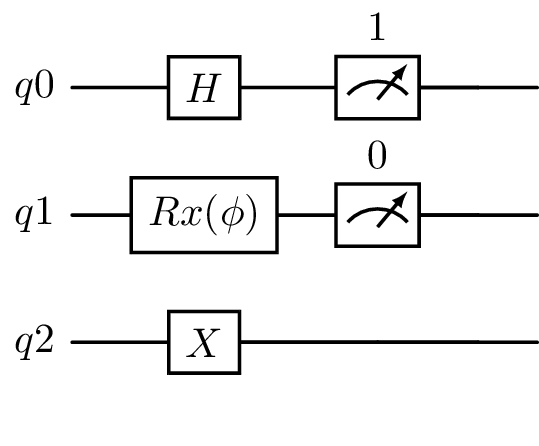

In [1]:
from geqo.visualization import plot_latex
from geqo.core import Sequence
from geqo.gates import Hadamard, PauliX, Rx
from geqo.simulators import ensembleSimulatorSymPy
from geqo.operations import Measure

sim = ensembleSimulatorSymPy(3, 2)

seq = Sequence(
    ["q0", "q1", "q2"],
    ["c0", "c1"],
    [
        (Hadamard(), ["q0"], []),
        (PauliX(), ["q2"], []),
        (Rx("phi"), ["q1"], []),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
    ],
)

plot_latex(seq, backend=sim, greek_symbol=True)

To handle long gate labels, geqo truncates gate labels longer than four characters to their first three characters and returns a mapping of the new labels. An additional number may be appended to the truncated label to distinguish between labels with identical initial characters.

gate name abcdefg not valid
gate name abcdaa not valid
gate name abcdefg not valid
The sequence involves long gate labels. They are renamed as:
$sqqqqqq^\dagger$ -> $sqq^\dagger$
sqqqqqq -> sqq
abcdefg -> abc1
abcdaa -> abc2
ABCDE -> ABC1
ABCDG -> ABC2
sqqqqqs -> sqq1
sbsss -> sbs
Geqoov -> Geq
sdddd -> sdd
sddda -> sdd1


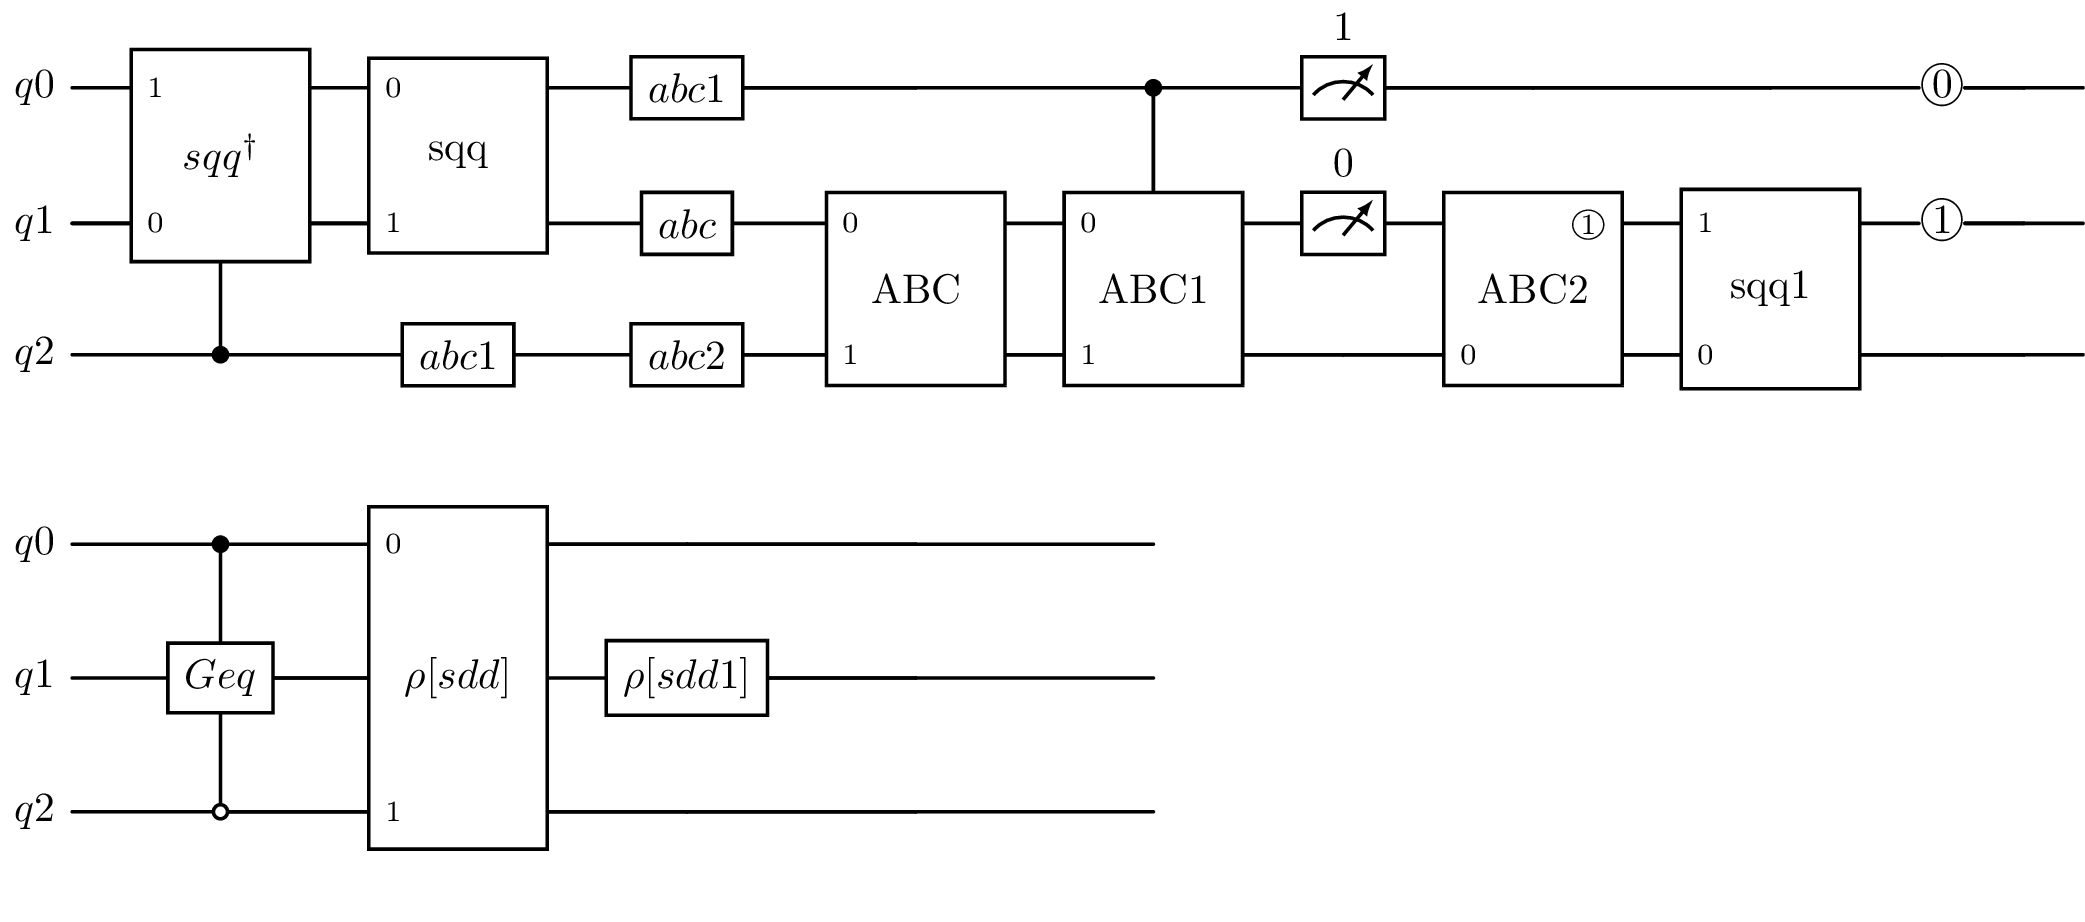

In [6]:
from geqo.visualization import plot_latex
from geqo.core import Sequence, BasicGate
from geqo.simulators import ensembleSimulatorSymPy
from geqo.operations import Measure, QuantumControl, ClassicalControl
from geqo.initialization import SetQubits, SetBits, SetDensityMatrix

sim = ensembleSimulatorSymPy(3, 2)

sq = Sequence([0, 1], [], [(PauliX(), [0], [])], "sqqqqqq")

seq = Sequence(
    ["q0", "q1", "q2"],
    ["c0", "c1"],
    [
        (QuantumControl([1], sq.getInverse()), ["q2", "q1", "q0"], []),
        (sq, ["q0", "q1"], []),
        (BasicGate("abcdefg", 1), ["q2"], []),
        (BasicGate("abcdaa", 1), ["q2"], []),
        (BasicGate("abcdefg", 1), ["q0"], []),
        (BasicGate("abc", 1), ["q1"], []),
        (BasicGate("ABC", 2), ["q1", "q2"], []),
        (QuantumControl([1], BasicGate("ABCDE", 2)), ["q0", "q1", "q2"], []),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
        (ClassicalControl([1], BasicGate("ABCDG", 1)), ["q2"], ["c1"]),
        (SetQubits("sqqqqqs", 2), ["q2", "q1"], []),
        (SetBits("sbsss", 2), [], [0, 1]),
        (QuantumControl([1, 0], BasicGate("Geqoov", 1)), [0, 2, 1], []),
        (SetDensityMatrix("sdddd", 2), [0, 2], []),
        (SetDensityMatrix("sddda", 1), [1], []),
    ],
)

sim.setValue("sbsss", [0, 1])

plot_latex(seq, backend=sim, greek_symbol=True)

Besides showing the circuit in a graphical representation, the corresponding LaTeX code can also be obtained with the function ```tolatex```. This is helpful for using the LaTeX code of a quantum circuit in LaTeX documents. 

In [3]:
from geqo.visualization import tolatex
from geqo.core import Sequence
from geqo.gates import Hadamard, PauliX, Rx
from geqo.simulators import ensembleSimulatorSymPy

sim = ensembleSimulatorSymPy(3, 2)

seq = Sequence(
    ["q0", "q1", "q2"],
    ["c0", "c1"],
    [
        (Hadamard(), ["q0"], []),
        (PauliX(), ["q2"], []),
        (Rx("phi"), ["q1"], []),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
    ],
)

latex_code = tolatex(seq, backend=sim, fold=8, greek_symbol=True)
print(latex_code)

\begin{quantikz}[color=black,background color=white]
\lstick{$q0$}&\gate[style={draw=black,fill=white!20},label style=black]{H}&\meter[style={draw=black,fill=white!20}]{1}&\qw & \\
\lstick{$q1$}&\gate[style={draw=black,fill=white!20},label style=black]{Rx(\phi)}&\meter[style={draw=black,fill=white!20}]{0}&\qw & \\
\lstick{$q2$}&\gate[style={draw=black,fill=white!20},label style=black]{X}&\qw &\qw & \\
\end{quantikz}


## Circuit Visualisation with Matplotlib
Another way for graphical representations of quantum circuits is based on Matplotlib. The following example shows how a circuit can be drawn with the function `plot_mpl`.

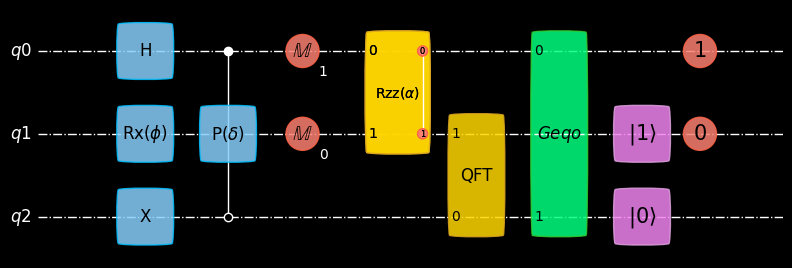

In [ ]:
from geqo.visualization import plot_mpl
from geqo.core import Sequence, BasicGate
from geqo.gates import Hadamard, PauliX, Rx, Phase, Rzz
from geqo.operations.controls import QuantumControl, ClassicalControl
from geqo.algorithms import QFT
from geqo.initialization import SetQubits, SetBits
from geqo.simulators import ensembleSimulatorSymPy
from geqo.operations import Measure

sim = ensembleSimulatorSymPy(3, 2)

seq = Sequence(
    ["q0", "q1", "q2"],
    ["c0", "c1"],
    [
        (Hadamard(), ["q0"], []),
        (PauliX(), ["q2"], []),
        (Rx("phi"), ["q1"], []),
        (QuantumControl([1, 0], Phase("delta")), [2, 0, 1], []),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
        (ClassicalControl([0, 1], Rzz("alpha")), [0, 1], ["c0", "c1"]),
        (QFT(2), ["q2", 1], []),
        (BasicGate("Geqo", 2), [0, 2], []),
        (SetQubits("sq", 2), ["q2", "q1"], []),
        (SetBits("sb", 2), [], [0, 1]),
    ],
)
sim.setValue("sq", [0, 1])
sim.setValue("sb", [1, 0])
plot_mpl(seq, backend=sim, style="geqo_dark", greek_symbol=True)

The handling of long gate labels in `plot_mpl` is identical to that in `plot_latex`.

The sequence involves long gate labels. They are renamed as:
$sqqqqqq^\dagger$ -> $sqq^\dagger$
sqqqqqq -> sqq
Geqooo -> Geq1
sbsss -> sbs
Geqoov -> Geq2
sdddd -> sdd
sddda -> sdd1


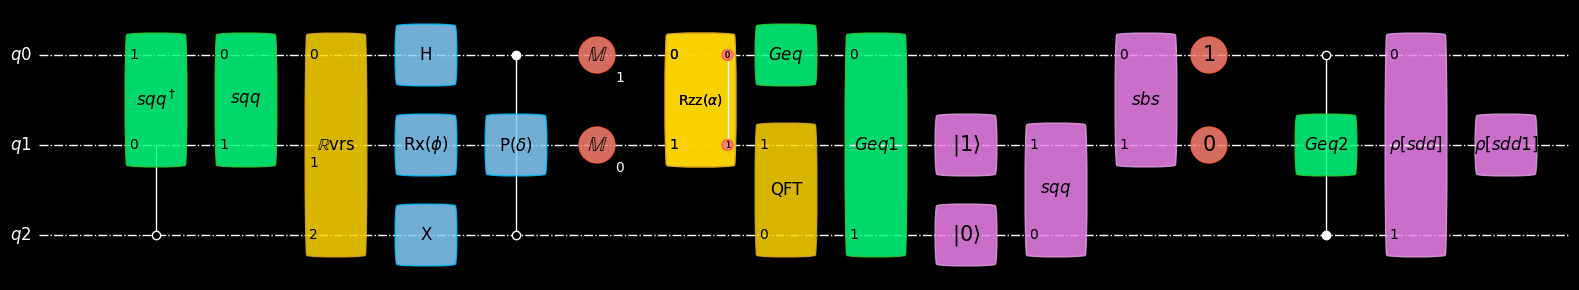

In [2]:
from geqo.visualization import plot_mpl
from geqo.core import Sequence, BasicGate
from geqo.gates import Hadamard, PauliX, Rx, Phase, Rzz
from geqo.operations.controls import QuantumControl, ClassicalControl
from geqo.algorithms import QFT, QubitReversal
from geqo.initialization import SetQubits, SetBits, SetDensityMatrix
from geqo.simulators import ensembleSimulatorSymPy
from geqo.operations import Measure

sim = ensembleSimulatorSymPy(3, 2)

sq = Sequence([0, 1], [], [(PauliX(), [0], [])], "sqqqqqq")

seq = Sequence(
    ["q0", "q1", "q2"],
    ["c0", "c1"],
    [
        (QuantumControl([1], sq.getInverse()), ["q2", "q1", "q0"], []),
        (sq, ["q0", "q1"], []),
        (QubitReversal(3), [0, 1, 2], []),
        (Hadamard(), ["q0"], []),
        (PauliX(), ["q2"], []),
        (Rx("phi"), ["q1"], []),
        (QuantumControl([1, 0], Phase("delta")), [2, 0, 1], []),
        (Measure(2), ["q0", "q1"], ["c1", "c0"]),
        (ClassicalControl([0, 1], Rzz("alpha")), [0, 1], ["c0", "c1"]),
        (QFT(2), ["q2", 1], []),
        (BasicGate("Geq", 1), [0], []),
        (BasicGate("Geqooo", 2), [0, 2], []),
        (SetQubits("sq", 2), ["q2", "q1"], []),
        (SetQubits("sqqqqqq", 2), ["q2", "q1"], []),
        (SetBits("sbsss", 2), [], [0, 1]),
        (SetBits("sb", 2), [], [0, 1]),
        (QuantumControl([1, 0], BasicGate("Geqoov", 1)), [0, 2, 1], []),
        (SetDensityMatrix("sdddd", 2), [0, 2], []),
        (SetDensityMatrix("sddda", 1), [1], []),
    ],
)
sim.setValue("sq", [0, 1])
sim.setValue("sb", [1, 0])
plot_mpl(seq, backend=sim, style="geqo_dark", greek_symbol=True)
# φ

## Visualization of measurement results
geqo includes the function ```plot_hist``` for displaying measurement results of quantum circuits. The following plot shows the results of a small circuit with 3 qubits, which are measured at the end of the circuit. 

Additional functionality like zooming and panning can be added to the plot via the ```%matplotlib widget``` command.

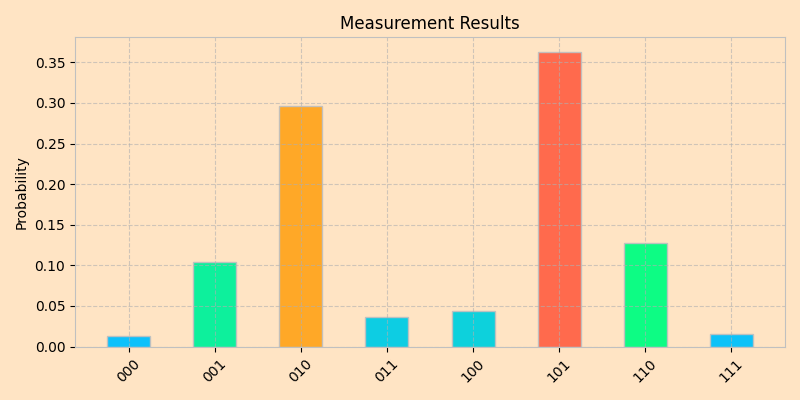

In [1]:
%matplotlib widget
from geqo.gates import Hadamard, CNOT, Ry
from geqo.operations import Measure
from geqo.simulators import ensembleSimulatorSymPy
from geqo.visualization import plot_hist, plot_mpl

sim = ensembleSimulatorSymPy(3, 3)

angles = ["a", "b", "c"]
values = [0.1, 0.5, 0.9]
for angle, value in zip(angles, values):
    sim.setValue(angle, value)

for i in range(3):
    sim.apply(Hadamard(), [i])
    sim.apply(Ry(angles[i]), [i])
sim.apply(CNOT(), [0, 1])
sim.apply(CNOT(), [1, 2])
sim.apply(Measure(3), [*range(3)], [*range(3)])

plot_hist(sim.ensemble, show_bar_labels=False)